# Introduction to Exploritary Data Analysis
Using Pandas!

This notebook goes along with a tutorial that can be found on the [Medallion Data Science youtube channel](https://www.youtube.com/channel/UCxladMszXan-jfgzyeIMyvw). Click the link and subscribe for future tutorials.

# Step 0: Imports and Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [2]:
df = pd.read_csv('input/train.csv')

## Step 1: Data Understanding
- Dataframe `shape`
- `head` and `tail`
- `dtypes`
- `describe`


In [3]:
df.shape

(8693, 14)

In [4]:
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [6]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [7]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


# Step 2: Data Preperation
- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming Columns
- Feature Creation

In [74]:
df = df.dropna()

In [161]:
# Split the column into two new columns
df[['Group', 'ID']] = df['PassengerId'].str.split('_', expand=True)

df['HomePlanetID'] = df['HomePlanet'].astype(object).replace({'Earth': 1, 'Mars': 2, 'Europa': 3})

#df['CabinID'] = pd.factorize(df['Cabin'])[0]  # factorize returns (array of IDs, unique values)

# Ensure 'Cabin' column has valid string values (handle NaNs)
df[['Deck', 'RoomNum', 'ShipSide']] = df['Cabin'].str.split('/', expand=True)

df['Deck'] = pd.factorize(df['Deck'])[0]  # factorize returns (array of IDs, unique values)
df['ShipSide'] = pd.factorize(df['ShipSide'])[0]  # factorize returns (array of IDs, unique values)


df['DestinationID'] = pd.factorize(df['Destination'])[0]  # factorize returns (array of IDs, unique values)


/var/folders/1j/x7vjwktn1l37ggq8qzq4phyw0000gn/T/ipykernel_44487/2396361720.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['HomePlanetID'] = df['HomePlanet'].astype(object).replace({'Earth': 1, 'Mars': 2, 'Europa': 3})


In [162]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,ID,HomePlanetID,DestinationID,Deck,RoomNum,ShipSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,3,0,0,0,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,1,0,1,0,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,3,0,2,0,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,3,0,2,0,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,1,0,1,1,1


In [163]:
df_filtered = df.select_dtypes(include=['number', 'bool'])

In [164]:
df_filtered.isna().sum()

Age              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Transported      0
HomePlanetID     0
DestinationID    0
Deck             0
ShipSide         0
dtype: int64

In [165]:
# Unique values
print('Home planets:', df['HomePlanet'].nunique())
print('Decks:', df['Deck'].nunique())
print('Room numbers:', df['RoomNum'].nunique())
print('Sides:', df['ShipSide'].nunique())
print('Destinations:', df['Destination'].nunique())

Home planets: 3
Decks: 8
Room numbers: 1734
Sides: 2
Destinations: 3


In [147]:
# Checking an example duplicate
df.query('HomePlanetID == 1.0')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,ID,HomePlanetID,DestinationID,Deck,RoomNum,ShipSide
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,1,0,F,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,1,0,F,1,S
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,0005,01,1,1,F,0,P
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,0006,01,1,0,F,2,S
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True,0007,01,1,0,F,3,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8681,9270_01,Earth,True,G/1497/S,55 Cancri e,33.0,False,0.0,0.0,0.0,0.0,0.0,Lan Mckinsond,True,9270,01,1,2,G,1497,S
8682,9272_01,Earth,False,G/1507/P,TRAPPIST-1e,26.0,False,240.0,242.0,510.0,0.0,0.0,Ireene Simson,True,9272,01,1,0,G,1507,P
8683,9272_02,Earth,False,F/1894/P,TRAPPIST-1e,21.0,False,86.0,3.0,149.0,208.0,329.0,Gordo Simson,False,9272,02,1,0,F,1894,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,01,1,1,G,1499,S


In [148]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Group', 'ID', 'HomePlanetID', 'DestinationID',
       'Deck', 'RoomNum', 'ShipSide'],
      dtype='object')

# Step 3: Feature Understanding
(Univariate analysis)

- Plotting Feature Distributions
    - Histogram
    - KDE
    - Boxplot

In [149]:
df['HomePlanet'].value_counts()

HomePlanet
Earth     3566
Europa    1673
Mars      1367
Name: count, dtype: int64

Text(0, 0.5, 'Count')

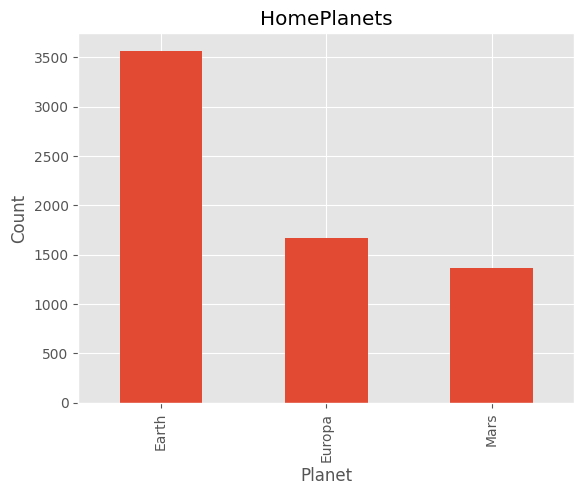

In [150]:
ax = df['HomePlanet'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='HomePlanets')
ax.set_xlabel('Planet')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

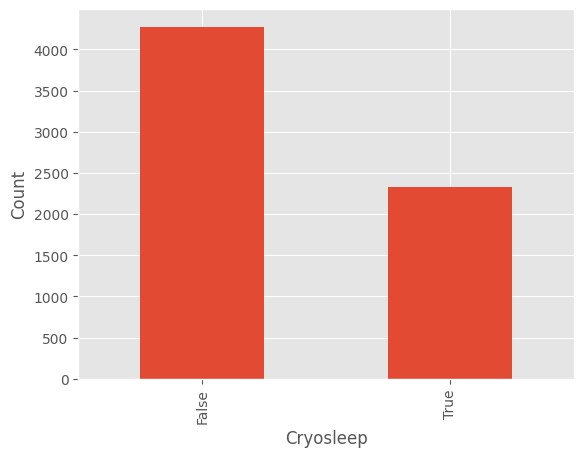

In [151]:
ax = df['CryoSleep'].value_counts() \
    .plot(kind='bar')
ax.set_xlabel('Cryosleep')
ax.set_ylabel('Count')

#Everyone in cryosleep are confined to their cabins

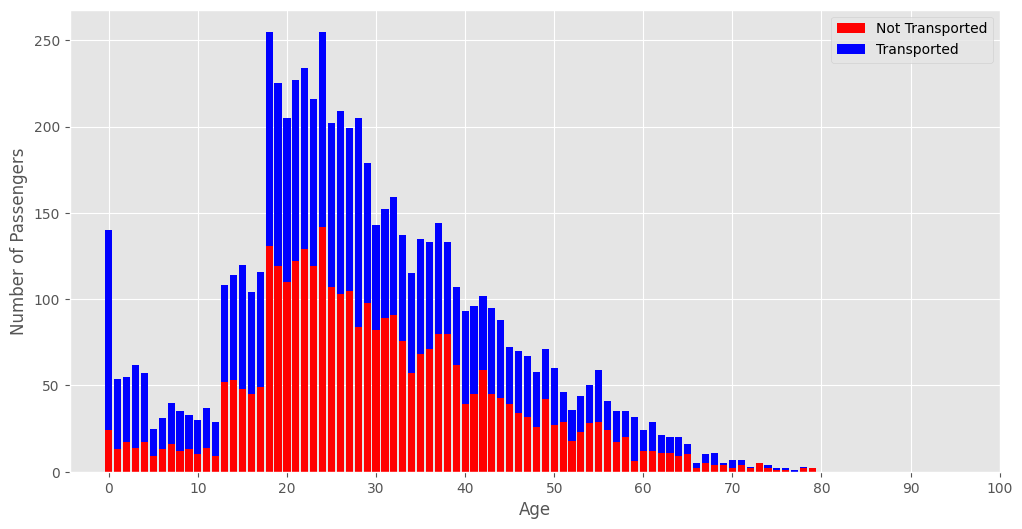

In [152]:
# Count total passengers per age
age_counts = df['Age'].value_counts().sort_index()

# Count transported passengers per age
transported_counts = df[df['Transported'] == True]['Age'].value_counts().sort_index()

# Ensure all ages have corresponding transported values (fill missing with 0)
transported_counts = transported_counts.reindex(age_counts.index, fill_value=0)

# Compute not transported counts
not_transported_counts = age_counts - transported_counts

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(age_counts.index, not_transported_counts, color='red', label='Not Transported')
ax.bar(age_counts.index, transported_counts, color='blue', label='Transported', bottom=not_transported_counts)

# Set x-ticks for better readability
ax.set_xticks(range(0, 101, 10))  # Show only 0, 10, 20, etc.

# Labels and legend
ax.set_xlabel('Age')
ax.set_ylabel('Number of Passengers')
ax.legend()

plt.show()


# Step 4: Feature Relationships
- Scatterplot
- Heatmap Correlation
- Pairplot
- Groupby comparisons

In [153]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Group', 'ID', 'HomePlanetID', 'DestinationID',
       'Deck', 'RoomNum', 'ShipSide'],
      dtype='object')

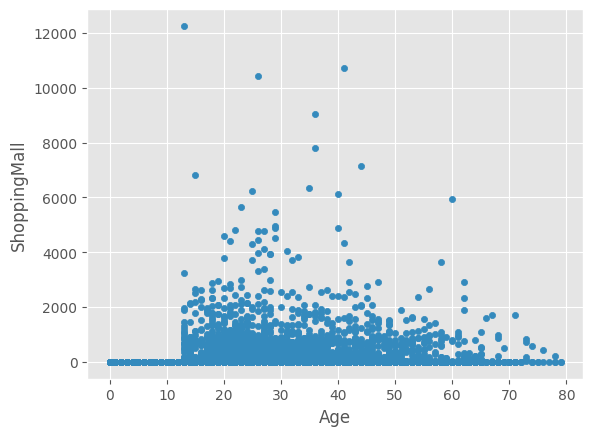

In [154]:
df.plot(kind='scatter',
        x='Age',
        y='ShoppingMall',
        title='')
plt.show()

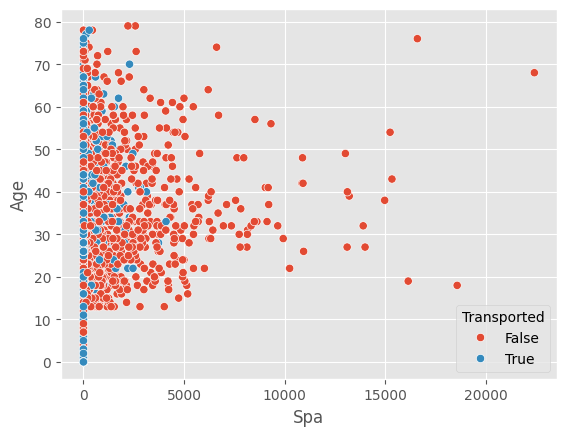

In [157]:
ax = sns.scatterplot(x='Spa',
                y='Age',
                hue='Transported',
                data=df)
plt.show()

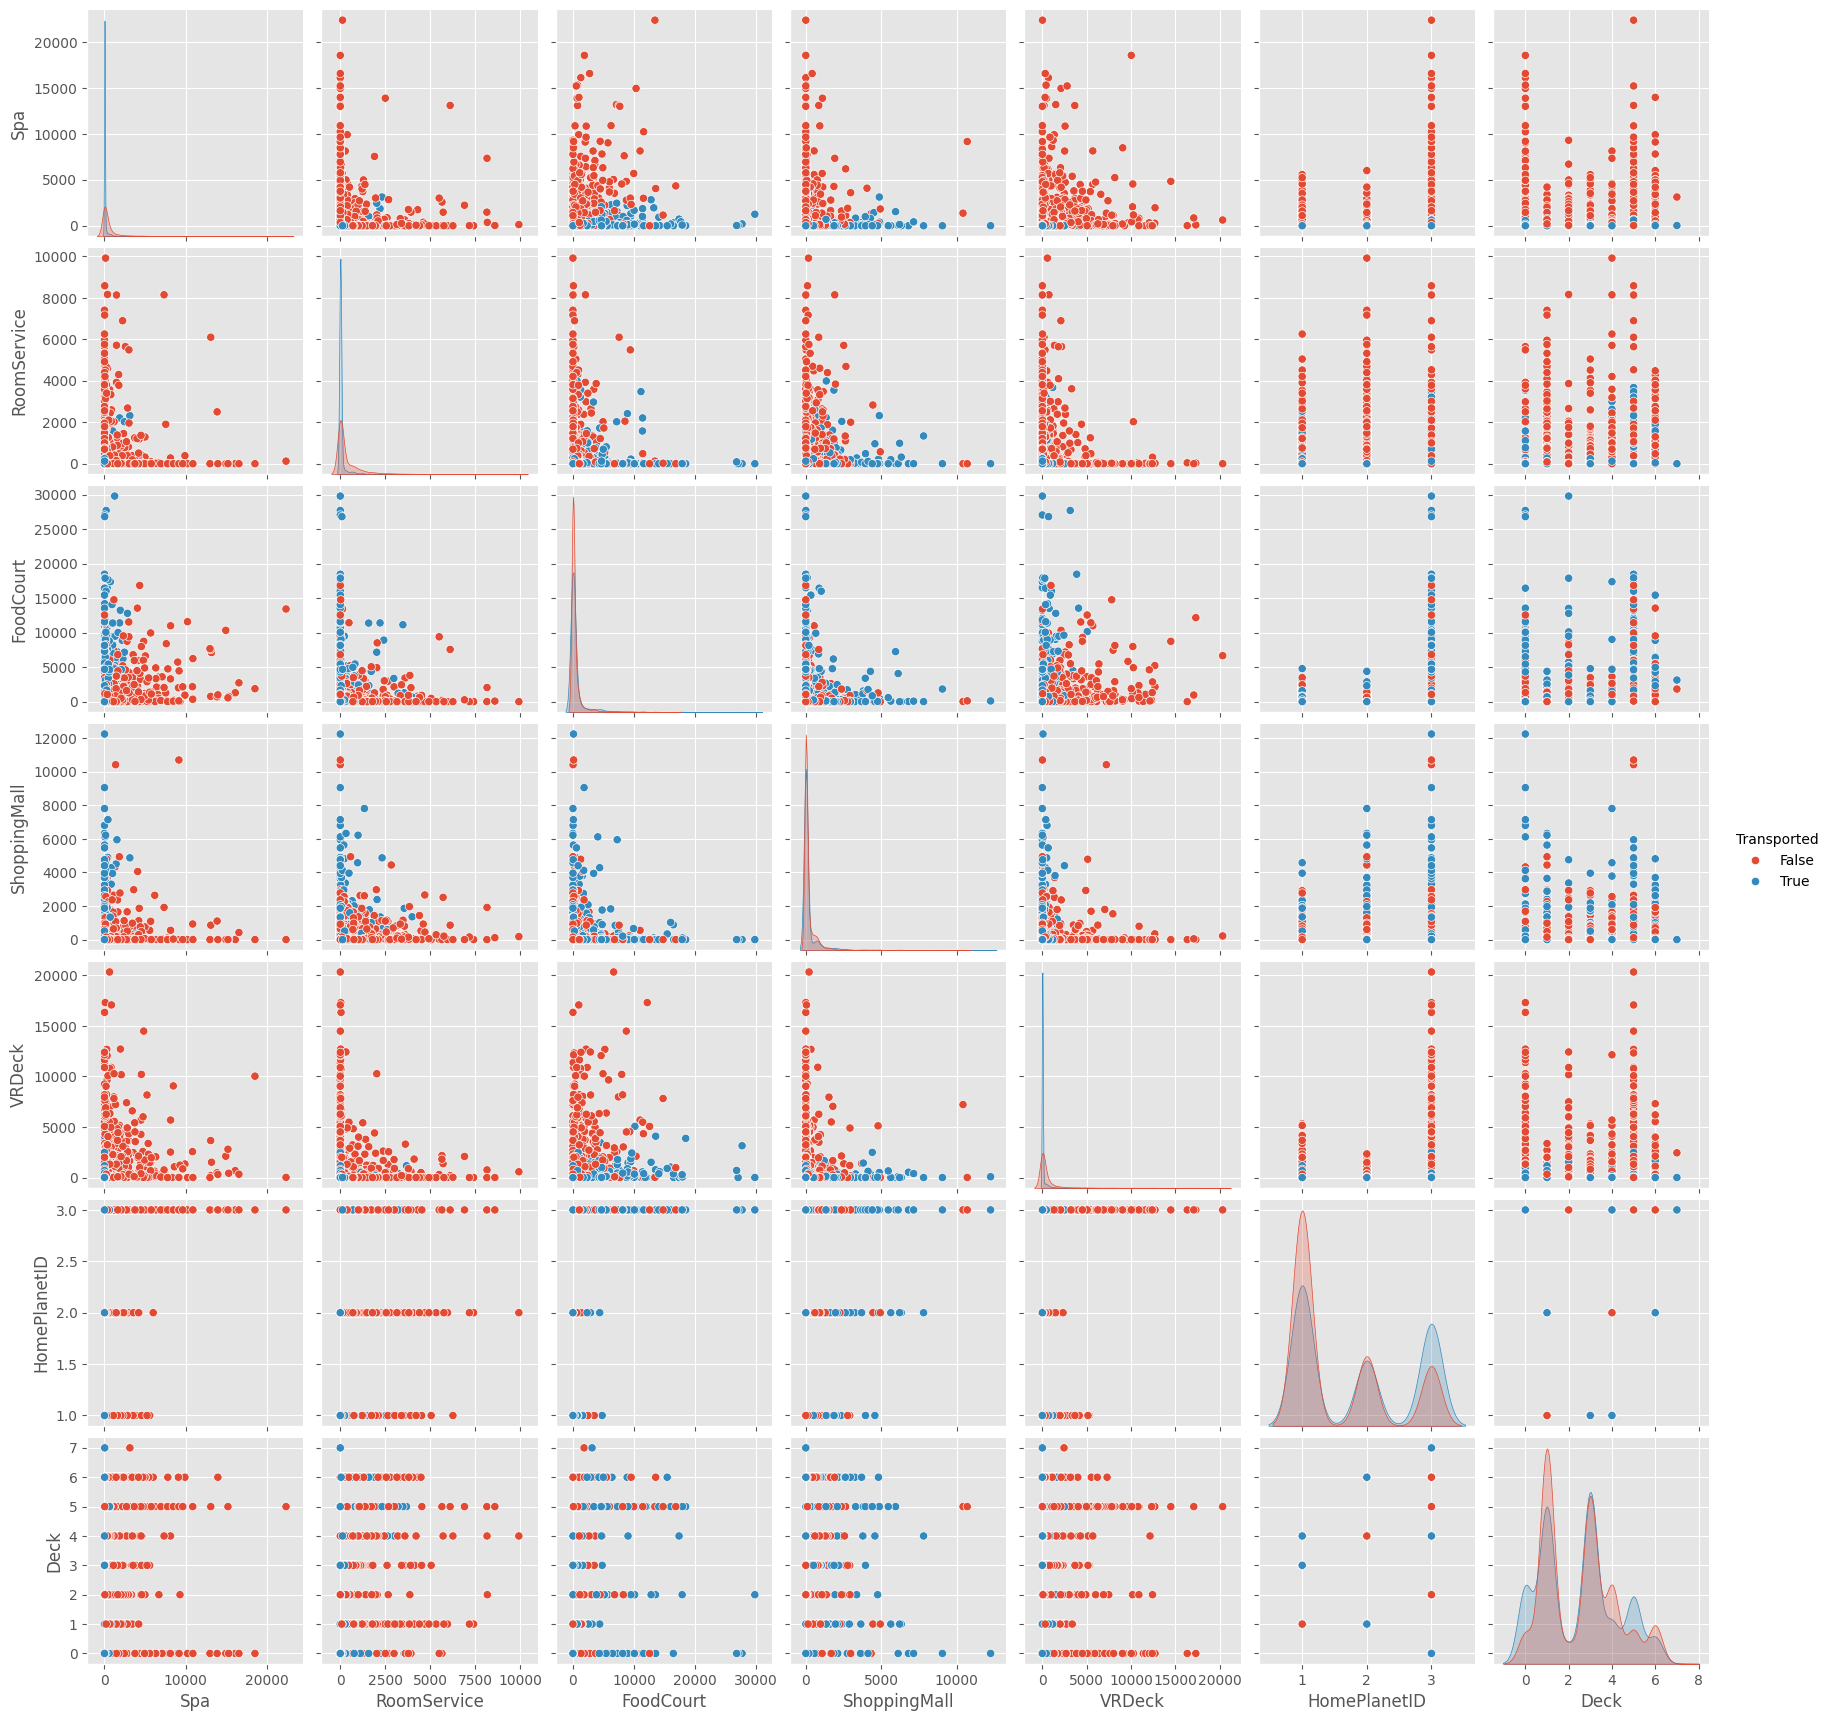

In [166]:
sns.pairplot(df,
             vars=['Spa',
                   'RoomService',
                   'FoodCourt',
                   'ShoppingMall',
                   'VRDeck',
                   'HomePlanetID',
                   'Deck'],
            hue='Transported')
plt.show()

In [167]:
df_filtered.head(5)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanetID,DestinationID,Deck,ShipSide
0,39.0,0.0,0.0,0.0,0.0,0.0,False,3,0,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,True,1,0,1,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,3,0,2,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,3,0,2,1
4,16.0,303.0,70.0,151.0,565.0,2.0,True,1,0,1,1


In [168]:
df_corr = df_filtered.corr()
df_corr

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanetID,DestinationID,Deck,ShipSide
Age,1.000000,0.074783,0.135844,0.042314,0.123820,0.105031,-0.082553,0.242439,0.010014,0.036291,0.006239
RoomService,0.074783,1.000000,-0.013614,0.060478,0.012472,-0.026002,-0.247291,0.040517,-0.055151,0.061321,-0.019137
FoodCourt,0.135844,-0.013614,1.000000,-0.012320,0.215995,0.216997,0.055025,0.323833,0.108887,0.063254,0.021578
ShoppingMall,0.042314,0.060478,-0.012320,1.000000,0.022168,0.000383,0.011602,0.035870,-0.021464,0.000687,-0.015709
Spa,0.123820,0.012472,0.215995,0.022168,1.000000,0.149447,-0.219854,0.232166,0.057562,0.039257,0.014806
VRDeck,0.105031,-0.026002,0.216997,0.000383,0.149447,1.000000,-0.207950,0.243425,0.073714,0.044417,-0.003409
Transported,-0.082553,-0.247291,0.055025,0.011602,-0.219854,-0.207950,1.000000,0.193676,0.123773,-0.019855,0.106186
HomePlanetID,0.242439,0.040517,0.323833,0.035870,0.232166,0.243425,0.193676,1.000000,0.160741,0.095396,0.033229
DestinationID,0.010014,-0.055151,0.108887,-0.021464,0.057562,0.073714,0.123773,0.160741,1.000000,0.012133,0.003923
Deck,0.036291,0.061321,0.063254,0.000687,0.039257,0.044417,-0.019855,0.095396,0.012133,1.000000,0.004566


<Axes: >

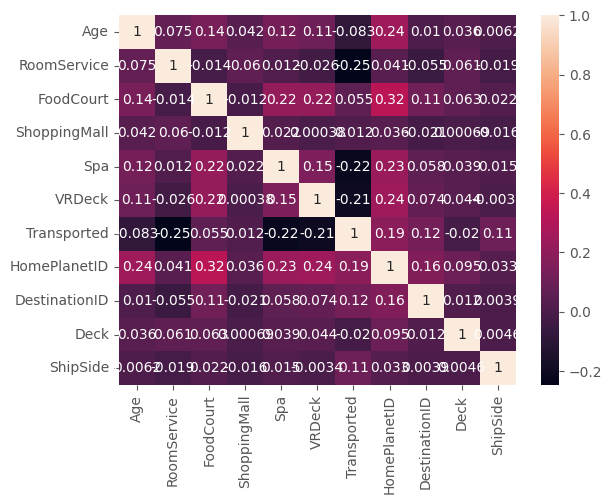

In [169]:
sns.heatmap(df_corr, annot=True)

In [99]:
df_fjerne_random = df_filtered.drop(columns=["CabinID", "Age"])
print(df_fjerne_random.shape)

(6606, 8)


In [89]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


df_train = df_fjerne_random.drop('Transported', axis=1)

X = df_train
y = df['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_classifier = DecisionTreeClassifier()

bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)

y_pred = bagging_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7844175491679274


In [100]:
print(df_filtered.shape)

(6606, 10)


In [93]:
import h2o
from h2o.automl import H2OAutoML

# Start H2O cluster
h2o.init()

df_h2o = h2o.H2OFrame(df_filtered)

# Load dataset
#train, test = df_h2o.split_frame(ratios=[0.8])

# Define AutoML model
aml = H2OAutoML(max_models=20, seed=1)
aml.train(y="Transported", training_frame=train)

# Evaluate
print(aml.leaderboard)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 min 12 secs
H2O_cluster_timezone:,Europe/Oslo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,3 months and 2 days
H2O_cluster_name:,H2O_from_python_henrik_wehre_zdd7y5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.979 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
11:26:55.852: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse       mse
StackedEnsemble_AllModels_1_AutoML_1_20250204_112655     0.882395   0.427643  0.890852                0.206583  0.37226   0.138577
StackedEnsemble_BestOfFamily_1_AutoML_1_20250204_112655  0.881778   0.428482  0.889414                0.206914  0.372721  0.138921
GBM_1_AutoML_1_20250204_112655                           0.878473   0.435489  0.884729                0.209362  0.375132  0.140724
GBM_grid_1_AutoML_1_20250204_112655_model_2              0.878241   0.437369  0.883521                0.204751  0.375259  0.140819
GBM_grid_1_AutoML_1_20250204_112655_model_3              0.878121   0.437314  0.886643      

In [103]:
df_test = pd.read_csv('input/test.csv')

df_test_h2o = h2o.H2OFrame(df_test)

# Make predictions on the test set
predictions = aml.leader.predict(df_test_h2o)

# View the predictions
print(predictions.head())

print(predictions.shape)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
███████████████████████████████████████████| (done) 100%
predict        False        True
True       0.284277   0.715723
False      0.996748   0.00325185
True       0.280939   0.719061
True       0.0727226  0.927277
True       0.409606   0.590394
True       0.295433   0.704567
True       0.287866   0.712134
True       0.251277   0.748723
True       0.274453   0.725547
True       0.330271   0.669729
[10 rows x 3 columns]

(4277, 3)


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'CabinID': substituting in a column of NaN
  warnings.warn(w)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'HomePlanetID': substituting in a column of NaN
  warnings.warn(w)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'DestinationID': substituting in a column of NaN
  warnings.warn(w)


In [104]:
# Convert the predictions H2OFrame to a pandas DataFrame
predictions_df = predictions.as_data_frame()

# Extract the 'PassengerId' column from the original dataset (df_filtered)
# Assuming 'PassengerId' is a column in your original dataframe
passenger_id = df_test['PassengerId']

# Combine the 'PassengerId' with the 'Transported' prediction
output_df = pd.DataFrame({
    'PassengerId': passenger_id,
    'Transported': predictions_df['predict']  # This column holds the prediction values
})

# Define the output file path (ensure the folder exists)
output_file_path = 'output/predictions.csv'

# Write the filtered DataFrame to a CSV file
output_df.to_csv(output_file_path, index=False)

print(f"Predictions have been saved to {output_file_path}")


Predictions have been saved to output/predictions.csv


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
